# Application: Degenerate Electrons

In white dwarfs, electron degeneracy pressure provides the dominant support against gravity.  Electrons are fermions, and when the density of the star is high, they are packed closely together.  Quantum mechanical effects come into play, and the electrons no longer behave as an ideal gas, but instead exhibit large pressure even at very low (or zero) temperature.

The origin of this is [Fermi-Dirac statistics](https://en.wikipedia.org/wiki/Fermi%E2%80%93Dirac_statistics)&mdash;no two electrons can occupy the same state, so as they get confined to a smaller and smaller volume, they need to take on larger momenta.

The distribution function describes the properties of the electrons, and has the following meaning: $n(p) d^3 x d^3 p$ is the number of particles with momentum $p$ in a volume $d^3x$.  Our distribution function is:


$$n(p) = \frac{2}{h^3} \frac{1}{e^{\mathcal{E}(p)/{k_B T} - \Psi} + 1}$$

where $\mathcal{E}$ is the kinetic energy of the electron, $T$ is the temperature, and $\Psi$ is the _degeneracy parameter_ which is related to the chemical potential, $\mu$, and the [Fermi energy](https://en.wikipedia.org/wiki/Fermi_energy), $\mathcal{E}_F$, as:

$$\Psi = \frac{\mu - m_e c^2}{k_B T} = \frac{\mathcal{E}_F}{k_B T}$$

```{note}
Some sources use $\eta$ instead of $\Psi$ for the degeneracy parameter.
```

The electrons are degenerate when $\Psi \gg 1$, which means that the Fermi energy is much greater than the thermal energy.  The electrons behave as an ideal gas when $-\Psi \gg 1$ (in this case, the $+1$ in the denominator of $n(p)$ is insignificant and we get the Maxwell-Boltzmann distribution).

To get the _number density_, we integrate over all momenta:

$$n = \int n(p) d^3 p$$

The pressure and specific internal energy, $e$, are then found as:

$$P = \frac{1}{3} \int n(p) v(p) p d^3 p$$
$$\rho e = \int n(p) \mathcal{E}(p) d^3 p$$

## Behavior of distribution function with $\Psi$

Let's look at the behavior of the distribution function.  Consider:

$$F(\mathcal{E}) = \frac{1}{e^{\mathcal{E}/k_B T - \Psi} + 1}$$

let's define

$$\xi \equiv \frac{\mathcal{E}}{k_B T}$$

then we have

$$F(\xi) = \frac{1}{e^{\xi - \Psi} + 1}$$

and for each choice of $\Psi$ we have a unique distribution.

We note that $\xi/\Psi = \mathcal{E}/\mathcal{E}_F$.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def F(xi, psi=100):
    return 1.0 / (np.exp(xi - psi) + 1)

Let's look at the case of $\Psi > 1$

<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipykernel_907977/289879296.py:7: SyntaxWarning: invalid escape sequence '\P'
  ax.plot(r, F(psi * r, psi=psi), label=f"$\Psi = {psi}$")


Text(0.5, 0, '$\\mathcal{E}/\\mathcal{E}_F$')

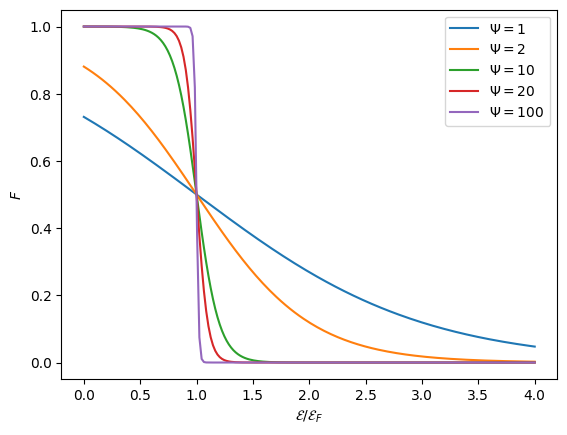

In [23]:
fig, ax = plt.subplots()

# we'll work in terms of r = xi / Psi
r = np.linspace(0, 4, 200)

for psi in [1, 2, 10, 20, 100]:
    ax.plot(r, F(psi * r, psi=psi), label=f"$\Psi = {psi}$")
    
ax.legend()
ax.set_ylabel("$F$")
ax.set_xlabel(r"$\mathcal{E}/\mathcal{E}_F$")

As we see, as $\Psi \rightarrow \infty$, the distribution, $F(\mathcal{E})$ becomes a step function.  This is the limit of complete degeneracy, and we have:

$$F(\mathcal{E}) = \left \{ \begin{array}{cc} 1 & \mathcal{E} < \mathcal{E}_F \\
                                              0 & \mathcal{E} > \mathcal{E}_F \end{array} \right .$$

We can alternately use the Fermi momentum, $p_F$ to describe the location of the step.

With this form, the integral for number density is trivial:

$$n_e = \frac{8\pi}{h^3} \int_0^{\mathcal{p}_F} p^2 dp$$

where we switched to spherical coordinates in momentum space: $d^3p \rightarrow 4\pi p^2 dp$.

For other values of $\Psi$, we have a problem:

$$n_e = \frac{8\pi}{h^3} \int_0^\infty \frac{p^2}{e^{\mathcal{E}(p)/k_B T - \Psi} + 1} dp$$

We don't know what the value of $\Psi$ is ahead of time.  Instead, we typically know what the density of the star is, and we can find the
number density of electrons as:

$$n_e = \frac{\rho Y_e}{m_u}$$

where $Y_e$ is the electron fraction (typically around $1/2$ for compositions heavier than hydrogen).  This means that given $\rho, T$,
we can solve for $\Psi$.

Once we have $\Psi$, we can then find the pressure and energy of the gas.

## Finding the trend of $\Psi$ with $\rho, T$

Let's now implement an algorithm to find the $\Psi$ that corresponds to an input $\rho$ (or $n_e$) and $T$.

We first need a function to compute $n_e$ given a $T$ and a guess for $\Psi$.  We'll use our composite Simpson's integration for this.

We'll assume that we are non-relativistic, so

$$\mathcal{E}(p) = \frac{p^2}{2 m_e}$$

```{note}
For $\rho > 10^6~\mathrm{g~cm^{-3}}$ relativistic effects are important, and we would need to use a more general form for $\mathcal{E}(p)$.
```

Our integral is then:

$$n_e = \frac{8\pi}{h^3} \int_0^\infty \frac{p^2 dp}{e^{p^2/(2m_e k_B T)-\Psi} + 1}$$

We can make a change of variables:

$$x = \frac{p}{\sqrt{2 m_e k_B T}}$$

and then we have:

$$n_e = \frac{8\pi}{h^3} (2 m_e k_B T)^{3/2} \int_0^\infty \frac{x^2 dx}{e^{x^2 - \Psi} + 1}$$

```{note}
Traditionally we express things in terms of $\mathcal{E}$, so that means:

$$p = (2 m_e \mathcal{E})^{1/2}$$

and

$$dp = (2m_e)^{1/2} \frac{1}{2} \mathcal{E}^{-1/2} d\mathcal{E}$$

and then we have:

$$n_e = \frac{4\pi}{h^3} (2 m_e)^{3/2} \int_0^\infty \frac{\mathcal{E}^{1/2} d\mathcal{E}}{e^{\mathcal{E}/k_BT - \Psi} + 1}$$

Then making it dimensionless using:

$$\xi = \mathcal{E}{k_BT}$$

we get:

$$n_e = \frac{4\pi}{h^3}(2 m_e k_B T)^{3/2} \int_0^\infty \frac{\xi^{1/2} d\xi}{e^{\xi-\Psi} + 1}$$

Integrals of the form:

$$F_n(\Psi) = \int_0^\infty \frac{\xi^n d\xi}{e^{\xi-\Psi} + 1}$$

are called [Fermi-Dirac integrals](https://en.wikipedia.org/wiki/Complete_Fermi%E2%80%93Dirac_integral).
We can write our number density as:

$$n_e = \frac{4\pi}{h^3} (2 m_e k_B T)^{3/2} F_{1/2}(\Psi)$$

There are a lot of papers that seek approximations to this type of integral, since they come up so often when dealing with degenerate matter.
```

```{caution}
Integrating $F_n(\Psi)$ using Simpson's rule for $n = \pm 1/2$ is difficult because there are singularities
in the derivatives at the origin.  See [Cloutman 1989](https://articles.adsabs.harvard.edu//full/1989ApJS...71..677C/0000677.000.html) for a discussion.

We'll stick with working with our dimensionless momentum, $x$.
```

Let's write a function that returns the integrand

In [24]:
def integrand(x, psi):
    return x**2 / (np.exp(x**2 - psi) + 1.0)

and now lets plot this for various $\Psi$

/tmp/ipykernel_907977/3209928939.py:2: RuntimeWarning: overflow encountered in exp
  return x**2 / (np.exp(x**2 - psi) + 1.0)


(0.0001, 100.0)

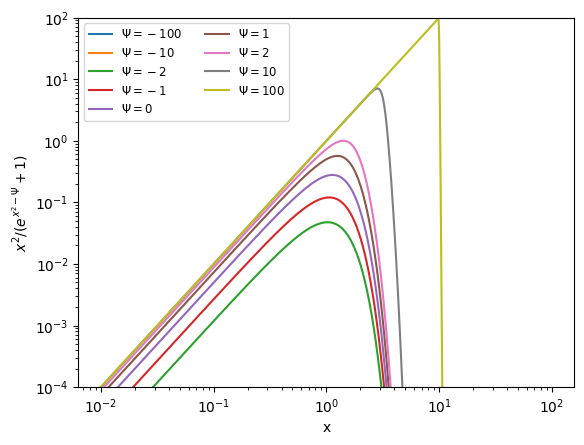

In [27]:
fig, ax = plt.subplots()
x = np.linspace(0, 100, 10000)
for psi in [-100, -10, -2, -1, 0, 1, 2, 10, 100]:
    ax.plot(x, integrand(x, psi), label=rf"$\Psi = {psi}$")
    
ax.legend(fontsize="small", ncol=2)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("x")
ax.set_ylabel(r"$x^2 / (e^{x^2-\Psi} + 1)$")

ax.set_ylim(1.e-4, 1.e2)

Now let's try scaling the integrand into $[0, 1]$.  We'll use the same technique we did for integrating the Planck function.

In [28]:
SMALL = 1.e-30

def zv(x, c):
    """ transform the variable x -> z """
    return x/(c + x) 

def xv(z, c):
    """ transform back from z -> x """
    return c*z/(1.0 - z + SMALL)

/tmp/ipykernel_907977/3209928939.py:2: RuntimeWarning: overflow encountered in exp
  return x**2 / (np.exp(x**2 - psi) + 1.0)


(1e-10, 100)

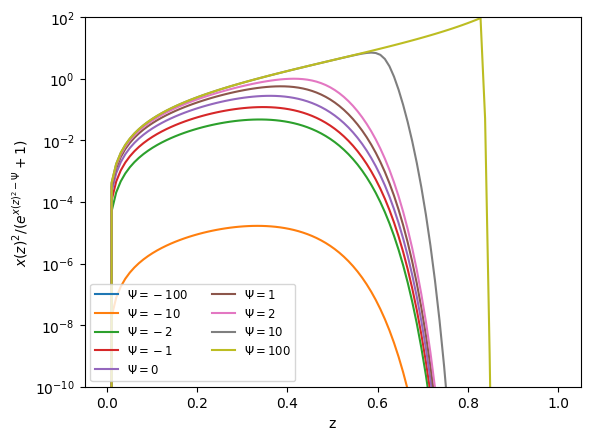

In [32]:
fig, ax = plt.subplots()

z = np.linspace(0, 1, 100)
c = 2.0

x = np.linspace(0, 100, 10000)
for psi in [-100, -10, -2, -1, 0, 1, 2, 10, 100]:
    ax.plot(z, integrand(xv(z, c), psi), label=rf"$\Psi = {psi}$")
    
ax.legend(fontsize="small", ncol=2)
ax.set_yscale("log")

ax.set_xlabel("z")
ax.set_ylabel(r"$x(z)^2 / (e^{x(z)^2-\Psi} + 1)$")

ax.set_ylim(1.e-10, 100)

This looks reasonable.  We might need to worry about resolving the sharp drop for the very large $\Psi$ (when we are completely degenerate).  But we'll produce an estimate of the error in the integral as we compute it.

First the fundamental constants we need

In [8]:
# CGS constants

h_planck = 6.63e-27
k_B = 1.38e-16
m_e = 9.11e-28
m_u = 1.67e-24

Now a Simpson's rule integrator for computing our integral, using the techniques we developed earlier for integrating to infinity.

In [9]:
def fd_integral(N, psi):
    """compute the integral over the Fermi-Dirac distribution
    using Simpsons rule with N intervals"""
    
    assert N % 2 == 0
    
    # we will transform from integrating over x to integrating over
    # z = x / (c + x) with z = [0, 1]

    c = 2.0
    z = np.linspace(0.0, 1.0, N+1, endpoint=True)
    
    I = 0.0
    for n in range(0, N, 2):
        fl = integrand(xv(z[n], c), psi) / (1.0 - z[n] + SMALL)**2
        fc = integrand(xv(z[n+1], c), psi) / (1.0 - z[n+1] + SMALL)**2
        fr = integrand(xv(z[n+2], c), psi) / (1.0 - z[n+2] + SMALL)**2
        
        I += (1.0/3.0) * (z[n+1] - z[n]) * (fl + 4*fc + fr)
        
    I *= c
    return I

Now a function that returns $n_e$.  This does the integral, ensuring we meet some accuracy, and adds in the physical constants to give us $n_e$. 

In [33]:
def compute_ne(T, psi, N=100, tol=1.e-8):
    """given a temperature and degeneracy parameter, psi,
    compute the number density of electrons by integrating
    the Fermi-Dirac distribution over all momenta"""
    
    # we'll do the dimensionless integral of
    # x**2 / (exp(x**2 - psi) + 1) using Simpson's rule
    # we will pick a value of N and do the integration
    # and then change N until the error is small

    err = 1.e30
    I_old = 1.e30
    
    while err > tol:
        I = fd_integral(N, psi)
        err = np.abs(I - I_old) / np.abs(I_old)
        I_old = I
        
        N *= 2
        
    ne = 8.0 * np.pi / h_planck**3 * (2.0 * m_e * k_B * T)**1.5 * I
    return ne

Now we want to do a root find on this.  We will start with bisection, although we note that there are better methods we could do.

In [34]:
def find_psi(rho, T, Ye=0.5, tol=1.e-6):
    """given rho, T, we want to find the degeneracy parameter, psi"""
    
    ne_input = rho * Ye / m_u
    
    psi_low = -100
    psi_high = 1000
    
    # we want to zero ne(T, psi) - ne_input)
    
    ne_low = compute_ne(T, psi_low) - ne_input
    ne_high = compute_ne(T, psi_high) - ne_input
     
    if ne_low * ne_high > 0:
        print("no root in this interval")
        
        return None
    
    err = 1.e10
    psi_mid = 0.5 * (psi_low * psi_high)
    
    while err > tol:
        ne_mid = compute_ne(T, psi_mid) - ne_input
        
        if ne_low * ne_mid > 0:
            # the root is in the right half of the interval
            psi_low = psi_mid
            ne_low = ne_mid
        else:
            psi_high = psi_mid
            ne_high = ne_mid
            
        psi_mid = 0.5 * (psi_low + psi_high)
        err = np.abs(psi_low - psi_high) / np.abs(psi_mid)
        
    return psi_mid

This is an implementation of the [secant method](https://en.wikipedia.org/wiki/Secant_method) which is essentially Newton's method with the derivative computed via a finite difference.

In [35]:
def find_psi2(rho, T, Ye=0.5, tol=1.e-6):
    """given rho, T, we want to find the degeneracy parameter, psi"""
    
    ne_input = rho * Ye / m_u
    
    psi_m1 = 10
    psi_0 = 20
    
    # we want to zero ne(T, psi) - ne_input)
    
    ne_m1 = compute_ne(T, psi_m1) - ne_input
    
    err = 1.e10
    
    while err > tol:
        ne_0 = compute_ne(T, psi_0) - ne_input   
        dne_dpsi = (ne_0 - ne_m1) / (psi_0 - psi_m1)
        
        psi_m1 = psi_0
        ne_m1 = ne_0
    
        psi_0 -= ne_0 / dne_dpsi
    
        err = np.abs(ne_0 / dne_dpsi) / np.abs(psi_0)
        
    return psi_0

In [36]:
T = 1.e7
rhos = np.logspace(-4, 6, 50)
psis = []

for rho in rhos:
    psi = find_psi2(rho, T)
    psis.append(psi)

/tmp/ipykernel_907977/3209928939.py:2: RuntimeWarning: overflow encountered in exp
  return x**2 / (np.exp(x**2 - psi) + 1.0)


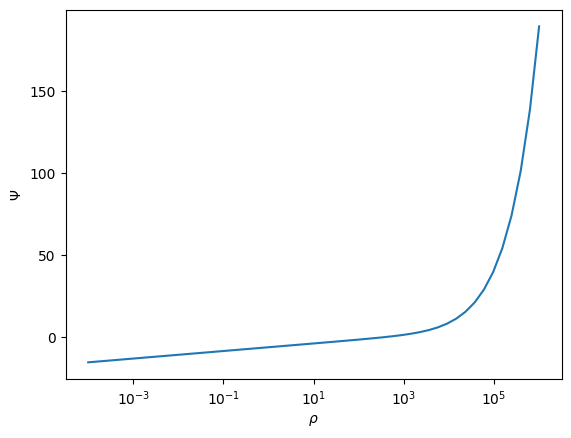

In [37]:
fig, ax = plt.subplots()
ax.plot(rhos, psis)
ax.set_xlabel(r"$\rho$")
ax.set_ylabel(r"$\Psi$")
ax.set_xscale("log")

## C++ implementation

A C++ version of the above method is available as [degeneracy.cpp](https://github.com/zingale/computational_astrophysics/blob/main/examples/roots/degeneracy.cpp)

```{literalinclude} ../../../examples/roots/degeneracy.cpp
:language: c++
```

## Improvements

* Simpson's rule is not the best method for integrating this.  In particular, we see that for $\Psi \gg 1$, we need a lot of points because of the sharp step   in the distribution function.  A better method would be to not use uniform intervals when doing this integral.

  * For example, [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) uses the QUADPACK library
    to do the integration, and uses a Gaussian quadrature for constructing the integral.

* The secant method begins with an initial guess, and we could try to seed the initial guess for $\Psi$ with the guess from the previous $\rho$
  solution.  This would accelerate convergence.

* Physically, we should extend $\mathcal{E}(p)$ to be relativistic, which would allow us to probe higher densities.

## SciPy implementation

Here's a version using the integration and root finding functions available in SciPy

In [16]:
from scipy import integrate, optimize

In [17]:
def ne_scipy(T, psi):
    I, err = integrate.quad(integrand, 0, np.inf, args=(psi))
    ne = 8.0 * np.pi / h_planck**3 * (2.0 * m_e * k_B * T)**1.5 * I
    return ne

def find_psi_scipy(rho, T, Ye=0.5):
    
    ne_input = rho * Ye / m_u
    psi_low = -100
    psi_high = 1000
    
    psi = optimize.brentq(lambda psi: ne_input - ne_scipy(T, psi), psi_low, psi_high)
    return psi

/tmp/ipykernel_785270/3209928939.py:2: RuntimeWarning: overflow encountered in exp
  return x**2 / (np.exp(x**2 - psi) + 1.0)


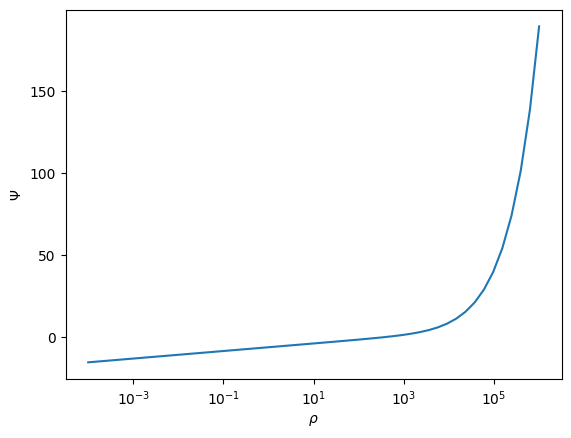

In [18]:
T = 1.e7
rhos = np.logspace(-4, 6, 50)
psis = []

for rho in rhos:
    psi = find_psi_scipy(rho, T)
    psis.append(psi)
    
fig, ax = plt.subplots()
ax.plot(rhos, psis)
ax.set_xlabel(r"$\rho$")
ax.set_ylabel(r"$\Psi$")
ax.set_xscale("log")